In [1]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D,Activation
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [2]:
img_width,img_height=150,150
train_data_dir=r"D:\data science\train"
validation_data_dir=r"D:\data science\test1"
nb_train_sample=100
nb_validation_samples=100
epochs=20
batch_size=20

In [3]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first':
    input_shape=(3,image_width,img_height)
else:
    input_shape=(img_width,img_height,3)

In [4]:
train_datagen=ImageDataGenerator(rescale=1. /255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1. /255)
train_generator=train_datagen.flow_from_directory(train_data_dir,target_size=(img_width,img_height),batch_size=batch_size,class_mode='binary')
validation_generator=test_datagen.flow_from_directory(validation_data_dir,target_size=(img_width,img_height),batch_size=batch_size,class_mode='binary')

Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 2 classes.


In [5]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 activation (Activation)     (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 350464)            0         
                                                                 
 dense (Dense)               (None, 64)                22429760  
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                        

In [6]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 activation (Activation)     (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 350464)            0         
                                                                 
 dense (Dense)               (None, 64)                22429760  
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                        

In [7]:
training=model.fit_generator(train_generator,steps_per_epoch=nb_train_sample,epochs=epochs,validation_data=validation_generator,validation_steps=nb_validation_samples)

C:\Users\sajal\AppData\Local\Temp\ipykernel_12272\2516328369.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training=model.fit_generator(train_generator,steps_per_epoch=nb_train_sample,epochs=epochs,validation_data=validation_generator,validation_steps=nb_validation_samples)


Epoch 1/20
100/100 [==============================] - 302s 3s/step - loss: 2.4665 - accuracy: 0.5395 - val_loss: 0.7312 - val_accuracy: 0.5000
Epoch 2/20
100/100 [==============================] - 224s 2s/step - loss: 0.6662 - accuracy: 0.6200 - val_loss: 0.8781 - val_accuracy: 0.4975
Epoch 3/20
100/100 [==============================] - 216s 2s/step - loss: 0.6428 - accuracy: 0.6290 - val_loss: 0.8334 - val_accuracy: 0.5060
Epoch 4/20
100/100 [==============================] - 213s 2s/step - loss: 0.6203 - accuracy: 0.6670 - val_loss: 0.9211 - val_accuracy: 0.5070
Epoch 5/20
100/100 [==============================] - 188s 2s/step - loss: 0.6310 - accuracy: 0.6645 - val_loss: 1.1208 - val_accuracy: 0.4950
Epoch 6/20
100/100 [==============================] - 176s 2s/step - loss: 0.6221 - accuracy: 0.6780 - val_loss: 0.9676 - val_accuracy: 0.5060
Epoch 7/20
100/100 [==============================] - 189s 2s/step - loss: 0.6055 - accuracy: 0.6705 - val_loss: 0.9389 - val_accuracy: 0.5075

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


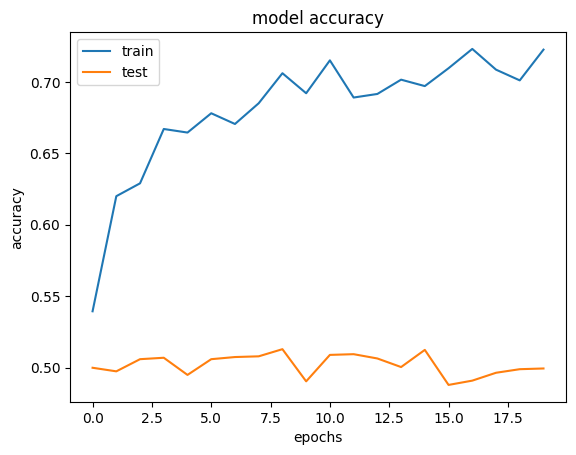

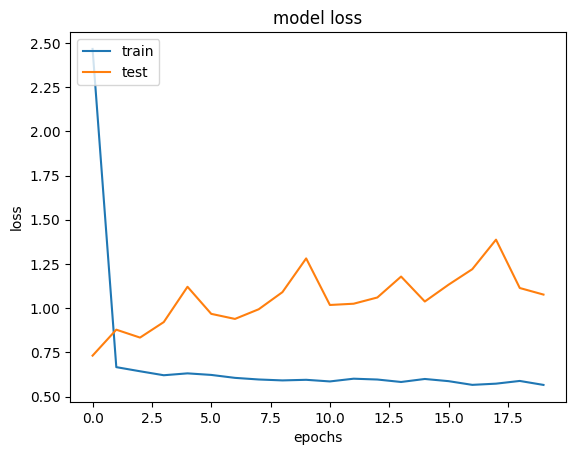

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
print(training.history.keys())
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [9]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred=image.load_img("D:\data science\test1\class1\1.jpg",target_size=(150,150))
img_pred=image.img_to_array(img_pred)
img_pred=image.expand_dims(img_pred,axis=0)
rslt=model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction='dog'
    
else:
    prediction='cat'
print('prediction:',prediction)
img=mpimg.imread("D:\data science\test1\class1\1.jpg")
imgplot=plt.imshow(img)
plt.show()

OSError: [Errno 22] Invalid argument: 'D:\\data science\test1\\class1\x01.jpg'